<a href="https://colab.research.google.com/github/toblaroni/Numerical-Computation-Methods/blob/main/numCompMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Gaussian elimination

In [2]:
def lower_triangular_solve(A, b):
    # Make sure the arrays are stored with correct type
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    # Check A is lower triangular
    rows = A.shape[0]
    cols = A.shape[1]
    
    x = np.zeros(b.shape)
    
    for i in range(0, rows):
        for j in range(i + 1, cols):
            if (j > i and not np.isclose(A[i, j], 0)):
                print("Array A is not lower triangular")
                return
            elif j == i and np.isclose(A[i, j], 0):
                print("Array A is not lower triangular1")
                return
            
    # Solve the system
    for i in range(0, rows):
        rA = 1 / A[i][i]
        sum = 0
        for j in range(0, i):
            sum += A[i][j] * x[j]
        x[i] = rA * (b[i] - sum)
    return x

In [3]:
def upper_triangular_solve(A, b):
    # Make sure array is stored correctly
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    # Make sure the array is square
    n, m = A.shape
    if (n != m):
        print("A is not square")
    
    # Make sure it's lower triangular
    for i in range(0, n):
        for j in range(0, i + 1):
            if j < i and not np.isclose(A[i, j], 0):
                print("A is not upper triangular")
                return
            elif j == i and np.isclose(A[i, j], 0):
                print("A is not upper triangular")
                return
            
    x = np.empty_like(b)
    
    # Solve by backward substitution
    x[n - 1] = b[n - 1] / A[n - 1, m - 1]
    for i in range(2, n+1):
        x[n-i] = b[n-i] / A[n-i, n-i]
        for j in range(n-i+1, m):
            x[n-i] -= A[n-i,j]*x[j] / A[n-i, n-i]
    return x

In [4]:
def gauss_elimination(A, b):
    # Convert to proper precision
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    # Check shape and diagonals
    n, m = A.shape
    if not n == m:
        raise ValueError(f"A is not square matrix. n={n}, m={m}")
    for i in range(0, n):
        if (A[i, i] == 0):
            raise ValueError(f"Non-zero diagonal value at index {i}")
            
    # Perform forward elimination
    for j in range(n):
        for i in range(j + 1, n):
            factor = A[i, j] / A[j, j]
            b[i] -= factor * b[j]
            for k in range(0, n):
                A[i, k] -= factor * A[j, k]

    return upper_triangular_solve(A, b)

# Iterative Methods

In [5]:
def Jacobi_iteration(A, b, max_iteration, x0=None):
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    n = len(b)
    
    for i in range(n):
        if np.isclose(A[i, i], 0):
            print("Diagonal element is non zero")
            return
    
    P = np.zeros([n, n])
    p = np.zeros(n)
    for i in range(n):
        # Compute P and p
        p[i] = b[i] / A[i, i]
        for j in range(n):
            P[i, j] = A[i, j] / A[i, i]
        P[i, i] = 0

    if x0 is None:
        x = np.zeros_like(b)
    else:
        x = x0.copy()

    # Compute
    x = np.zeros(n)
    for it in range(max_iteration):
        x = p - np.matmul(P, x)
    
    return x

In [6]:
# Test
A = np.array([[2, 1], [1, 2]])
b = np.array([3, 3])
x_exact = np.array([1,1])

myX = Jacobi_iteration(A, b, 100)
print('my solution = ', myX)


my solution =  [1. 1.]


In [7]:
def Gauss_Seidel_iteration(A, b, max_iteration, x0=None):

    A = A.astype(np.float64)
    b = b.astype(np.float64)

    n, m = A.shape
    
    for i in range(n):
        if np.isclose(A[i, i], 0):
            print("Diagonal element (%f %f) is zero!" %(i, i))
            return
        
    LD = np.zeros_like(A)
    U = np.zeros_like(A)
    for i in range(n):
        for j in range(n):
            if i < j:
                U[i, j] = A[i, j]
            else:
                LD[i, j] = A[i, j]

    p = lower_triangular_solve(LD, b)
    
    if x0 is None:
        x = np.zeros_like(b)
    else:
        x = x0.copy()
    
    # Array to hold the results
    Ux = np.empty_like(x)
    for it in range(max_iteration):
        for i in range(n):
            Ux[i] = 0.0
            for j in range(i+1, n):
                Ux[i] += U[i, j] * x[j]
        Px = lower_triangular_solve(LD, Ux)
        x = p - Px
    return x

In [8]:
# Code for calculating residual
def calc_residual(A, x, b):
    res = np.matmul(A, x) - b
    sum = 0
    for i in range(len(res)):
        sum += res[i] ** 2
    return np.sqrt(sum)

In [9]:
# Test different linear solvers starting from the above two-dimensional linear system
A = np.array([[2, -1, 0], [-1, 1, 3], [1, 0, 1]])
b = np.array([1, 3, 2])
# x_exact = np.array([1,1])

x0 = np.array([0, 0, 0])

# numpy linear solver
# x0 = np.linalg.solve(A,b)
# print("Solution by numpy solver:", x0)

# x = Jacobi_iteration(A, b, 40)
# print("Solution by Jacobi iteration: ",x)
# print("Error: ", x - x_exact)
# print("Residual: ", np.matmul(A,x)-b)


print("Residual before: ", np.matmul(A,x0)-b)
residualI = calc_residual(A, x0, b)
x = Gauss_Seidel_iteration(A, b, 1, x0)
print("Solution by Gauss Seidel iteration: ",x)
# print("Error: ", x - x_exact)
# print("Residual: ", np.matmul(A,x)-b)
print("Initial residual", residualI)
print(calc_residual(A, x, b))


Residual before:  [-1 -3 -2]
Solution by Gauss Seidel iteration:  [0.5 3.5 1.5]
Initial residual 3.7416573867739413
5.70087712549569


# Gaussian Elimination With pivoting

In [10]:
def Gaussian_elimination_pivoting(A, b):
    A = A.astype(np.float64)
    b = b.astype(np.float64)

    n = len(b)

    for i in range(n):
        maximum = A[i, i]
        max_index = i
        for j in range(i+1, n):
            if abs(A[j, i]) > maximum:
                maximum = abs(A[j, i])
                max_index = j

        # Swap rows if necessary
        if max_index is not i:
            for j in range(n):
                tmp = A[i, j]
                A[i, j] = A[max_index, j]
                A[max_index, j] = tmp
            tmp = b[i]
            b[i] = b[max_index]
            b[max_index] = tmp
        
        # Gaussian elimination to create upper triangular matrix
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            b[j] -= factor * b[i]
            for k in range(0, n):
                A[j, k] -= factor * A[i, k]

    return upper_triangular_solve(A, b)

In [11]:
# Testing
A = np.array([[-1, 1],
              [0, 1],
              [1, 1]])

b = np.array([0.5, 1.2, 1.5])

AT = np.transpose(A)
ATA = np.matmul(AT, A)
ATb = np.matmul(AT, b)

# numpy linear solvers
x0 = np.linalg.solve(ATA,ATb)
print(x0)
# print("Solution by numpy solver:", x0)

# x = Gaussian_elimination_pivoting(A, b)
# print("Gaussian elimination: ",x)
# print("Residual: ", np.matmul(A,x)-b)

[0.5        1.06666667]


# Sparse matrix multiplication

In [12]:
import numpy as np

A_real = np.array([3, 1.5, 4, 4, 2.2, 2, 6, 4, -9], dtype=np.float64)
I_row = np.array([0,   0,  1, 1,  1,  2, 2, 3, 3], dtype=np.int32)
I_col = np.array([0,   2,  0, 1,  2,  1, 2, 2, 3], dtype=np.int32) 

nonzero = len(A_real)
dim = 4
y = np.zeros(dim) + 1.
z = np.zeros(dim)

for k in range(nonzero):
    z[I_row[k]] += A_real[k] * y[I_col[k]]

print(z)

[ 4.5 10.2  8.  -5. ]


# Euler's Method

In [13]:
def Euler_method(t0, d0, dt, n):
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = t0 + i * dt

    # Compute Euler's method
    for it in range(1, n+1):
        d[it] = d[it - 1] + dt * f(t[it - 1], d[it - 1])

    return t, d


# Midpoint method

In [14]:
def midpoint_method(t0, d0, dt, n):
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = t0 + dt*i
    
    for i in range(1, n+1):
        d_mid = d[i-1] + 0.5 * dt * f(t[i-1], d[i-1])
        t_mid = t[i-1] + dt*0.5
        d[i] = d[i-1] + dt * f(t_mid, d_mid)

    return t, d

In [15]:
def f(t, d):
    return np.cos(2*np.pi*d)

def d_exact(t):
    return

t0 = float(0.)
d0 = float(0.0)
dt = float(0.5)
n = int(2)

t_Euler, d_Euler = midpoint_method(t0, d0, dt, n)
# t_midpoint, d_midpoint = midpoint_method(t0, d0, dt, n)

de = np.zeros(n+1)
for i in range(n+1):
    de[i] = d_exact(t_Euler[i])
    

print(d_Euler)
# import matplotlib.pyplot as plt
# fig = plt.figure()
# plt.plot(t_Euler, d_Euler, "-b", label="Euler")
# plt.plot(t_Euler, de, "-r", label="Exact")
# plt.plot(t_midpoint, d_midpoint, "--g", label="midpoint")
# plt.legend(loc="upper left")
# plt.xlabel("t")
# plt.ylabel("d")
# plt.grid()
# plt.show()

[ 0.00000000e+00  3.06161700e-17 -1.60812265e-16]


# Bisection and Newton Methods

In [16]:
def newton(f, df, x0, tol, n):
    x = x0
    y = f(x)
    it = 0
    while abs(y) > tol and it < n:
        it += 1
        x -= y / df(x)
        y = f(x)
    return x, it

def bisection(f, x0, x1, tol, n):
    it = 0
    x = (x0 + x1) / 2.
    xL = x0
    xR = x1

    y = f(x)
    yL = f(xL)
    yR = f(xR)
    while abs(y) > tol:
        if (it > 100000):
            print("Bisection Method failed to converge")
            return x, np.inf
        if y*yL < 0:
            xR = x
            yR = y
        elif y * yR < 0:
            xL = x
            yL = y
        x = (xL + xR) / 2
        y = f(x)
        it += 1
        # relErr = abs((x - 1.5) / 1.5)
    
    return x, it

In [17]:
m = 1
def f(t):
    return t*t - (m + 1/m)*t + 1

def df(t):
    return 2*t - (m + m**-1)

print(df(0))

x, it = newton(f, df, 0.0, 0.5, 100)
print(f"Newton's method: {x} after {it} iterations")

x, it = bisection(f, 0.0, 0.1, 0.5, 1000)
print(f"Bisection method: {x} after {it} iterations")

-2.0
Newton's method: 0.5 after 1 iterations
Bisection Method failed to converge
Bisection method: 0.05 after inf iterations


# Secant Method

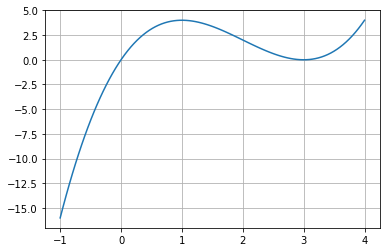

In [18]:
def f(x):
    return x*x*x - 6.0*x*x + 9.0*x

X = np.linspace(-1., 4., num=100, endpoint=True)
Y = np.zeros(100)
for i in range(len(Y)):
    Y[i] = f(X[i])

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(X, Y)
plt.grid()
plt.show()


In [19]:
def secant(f, x0, x1, tol):
    x = x1
    it = 0
    while abs(f(x)) > tol:
        x = x - f(x) * ((x - x0) / (f(x) - f(x0)))
        x0 = x1
        x1 = x
        it += 1
    return x, it

x, it = secant(f, 4.0, 5.0, 1.e-6)
print(f"The secant method: {x} after {it} iterations")

The secant method: 3.0004913634209194 after 17 iterations


# Least Squares Fitting

In [26]:
# Function to solve the normal equations for an
# Overdetermined system
def normal_equations(A, b):
    A = A.astype(np.float64)
    b = b.astype(np.float64)

    AT = np.transpose(A)
    ATA = np.matmul(AT, A)
    ATb = np.matmul(AT, b)

    return np.linalg.solve(ATA, ATb)


array([0.08571429, 0.4       , 1.42857143])

In [ ]:
A = np.array([[1,  -1,   1],
              [1, -0.5, 0.25],
              [1,   0,   0],
              [1, 0.5, 0.25],
              [1,  1,   1]])
b = np.array([1, 0.5, 0, 0.5, 2])
normal_equations(A, b)